In [1]:
load(file = "Xtrain.RData")
load(file = "Ytrain.RData")
load(file = "Xtest.RData")
load(file = "Ytest.RData")

In [84]:
img1 = matrix(rev(Xtrain[5,]), nrow = 200, ncol = 200, byrow = TRUE)

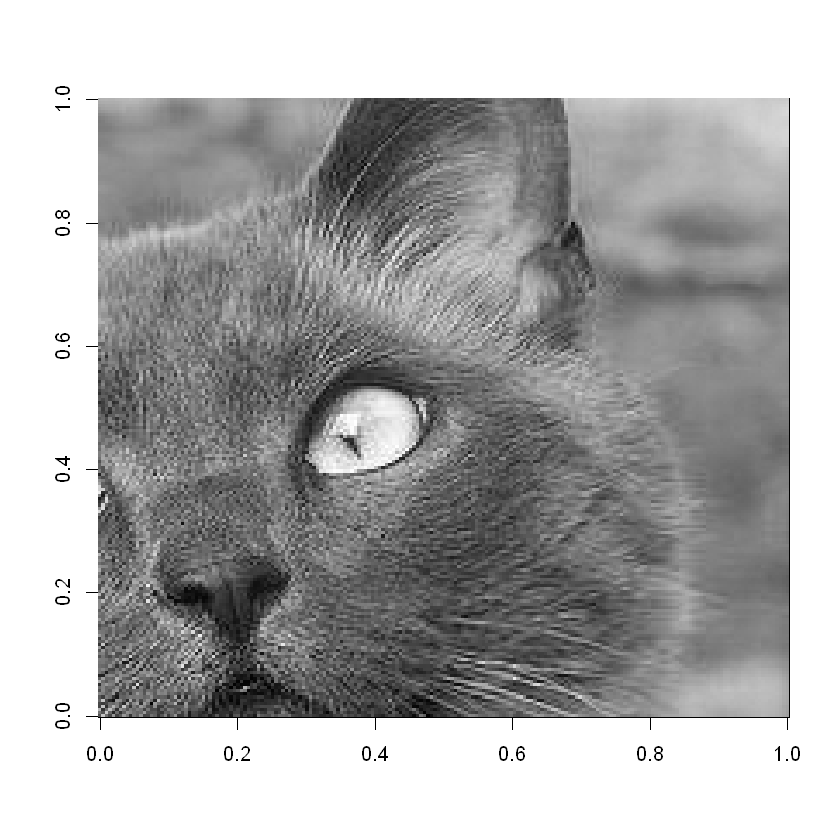

In [85]:
image(img1, col = grey(seq(0, 1, length = 256)))

In [88]:
Ytrain[5]

[1] 1

In [17]:
png('Img1.png')
image(img1, col = grey(seq(0, 1, length = 256)))
dev.off()

png 
  2

In [104]:
img2 = matrix(rev(Xtrain[250,]), nrow = 200, ncol = 200, byrow = TRUE)

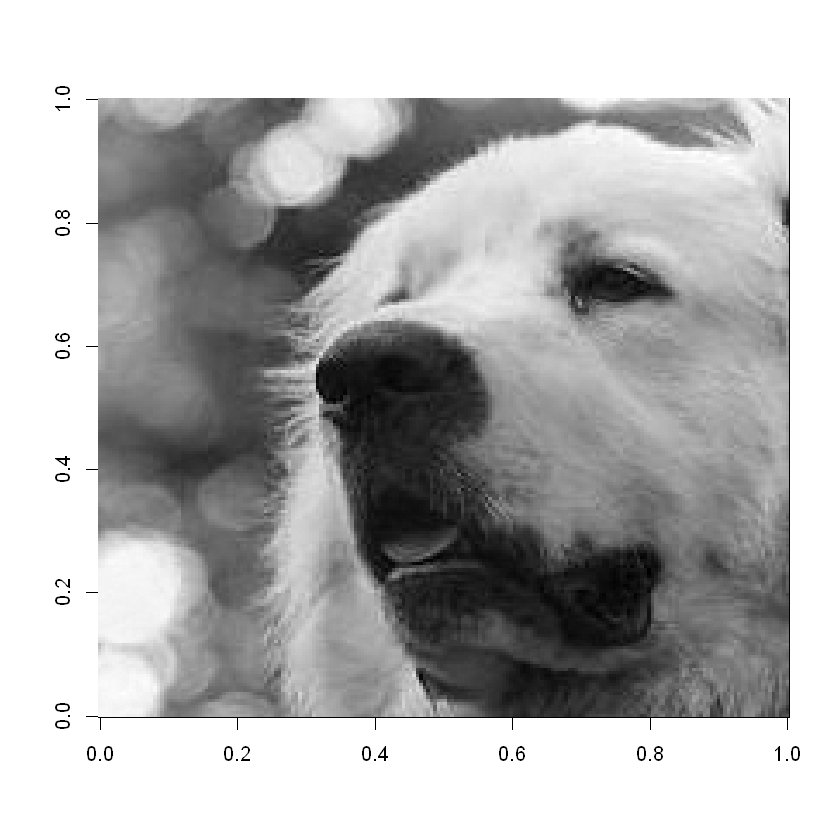

In [105]:
image(img2, col = grey(seq(0, 1, length = 256)))

In [106]:
Ytrain[250]

[1] 0

In [107]:
img3 = matrix(rev(Xtrain[300,]), nrow = 200, ncol = 200, byrow = TRUE)

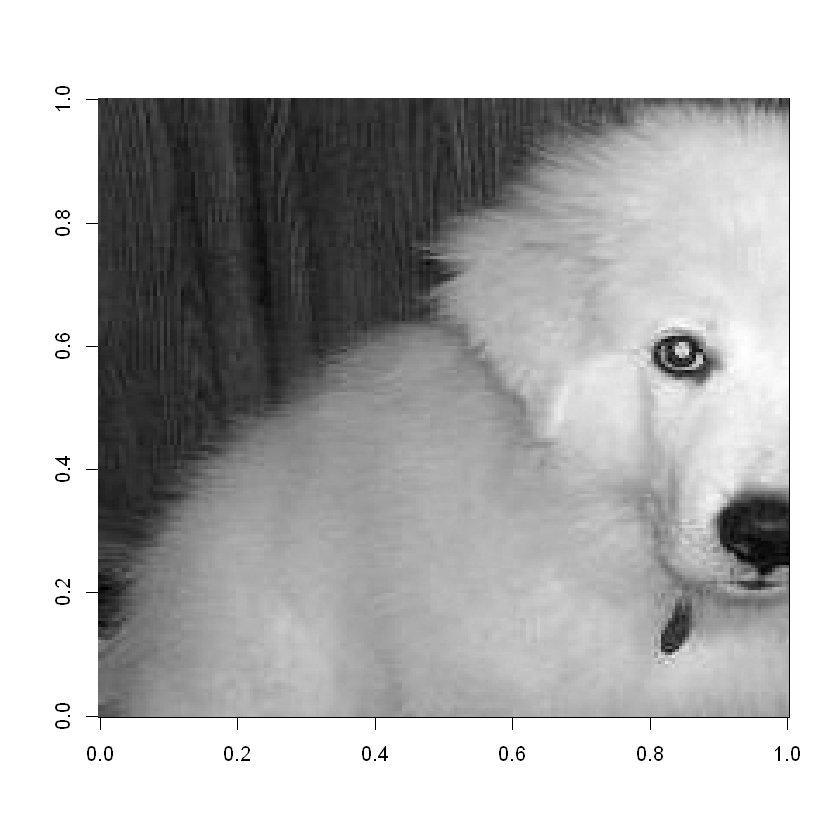

In [108]:
image(img3, col = grey(seq(0, 1, length = 256)))

In [109]:
Ytrain[300]

[1] 0

## Question 2:

### a) Analyse en composante principales des images (ACP)

In [2]:
# Concatener Xtrain et Xtest
X = rbind(Xtrain, Xtest)

In [3]:
# Center les vecteurs colonnes (en soustrayans le moyenne et divisant la ecart-type)
X <- scale(X, center = TRUE, scale = TRUE)

In [4]:
# Calculer vecteurs propres et valeurs singulières
X.svd <- svd(X, nu = 15, nv = 15)

In [5]:
d <- X.svd$d # d: un vecteur contenant 363 valeurs singulières de la matrice X
u <- X.svd$u # u: une matrice dont ses colonnes contenant les 15 vecteurs propres gauches de X (dimension 363x15)
v <- X.svd$v # v: une matrice dont ses colonnes contenant les 15 vecteurs propres droits de X (dimension 40000x15)

In [6]:
# Calculer la matrice des composantes principales
C <- X %*% v

In [7]:
# Vérifier sa dimension
dim(C)

[1] 363  15

### b) La part de variance expliquée

In [8]:
part_variance <- sum(d[1:15])/sum(d)

In [9]:
print(paste0("La part de variance expliquée en ne retenant que 15 composantes principales est ", round(part_variance*100, 2), "%"))

[1] "La part de variance expliquée en ne retenant que 15 composantes principales est 25.68%"


In [10]:
Ctrain = C[1:315,]

In [11]:
Ctest = C[316:363,]

## Question 9:

In [12]:
# Fonction qui calcule les estimateurs du maximum de vraisamblance
computeML <- function(C, Y) {
    n = length(Y)
    N1 = sum(Y)
    pi <- N1/n
    mu1 <- colMeans(C[(which(Y == 1)),])
    mu0 <- colMeans(C[(which(Y == 0)),])
    C1_centrer = C[(which(Y == 1)),] - mu1
    C0_centrer = C[(which(Y == 0)),] - mu0
    Sigma1 = 1/N1*(t(C1_centrer) %*% C1_centrer)
    Sigma0 = 1/(n - N1)*(t(C0_centrer) %*% C0_centrer)
    return(list(pi, mu1, mu0, Sigma1, Sigma0))
}

In [13]:
# Realiser sur Ctrain, Ytrain
ML_train <- computeML(Ctrain, Ytrain)

In [14]:
pi <- ML_train[[1]]
mu1 <- ML_train[[2]]
mu0 <- ML_train[[3]]
Sigma1 <- ML_train[[4]]
Sigma0 <- ML_train[[5]]

In [15]:
pi

[1] 0.4984127

In [16]:
mu1

[1] -52.21072917  -2.78041601   0.36528517 -11.93720650   1.74127290
 [6]  -2.02183600   1.07376111  -5.05172344   0.14479270  -2.77651578
[11]   1.30740369   0.08603251  -1.58766688   1.46502559  -0.74033747

In [17]:
mu0

[1] 51.13600256  4.88661781  0.98511593 10.69928365 -2.52257098  0.06747120
 [7] -1.87883781  1.55170165  0.22019777  2.29934186 -0.45876834 -0.27424567
[13]  1.04426271 -0.04431903 -0.04196325

In [18]:
# Rappler MASS package
library(MASS)

In [19]:
# Fit modele
qda.fit = qda(x = Ctrain, grouping = factor(Ytrain))

In [20]:
qda.fit

Call:
qda(Ctrain, grouping = factor(Ytrain))

Prior probabilities of groups:
        0         1 
0.5015873 0.4984127 

Group means:
          1         2         3         4         5          6         7
0  51.13600  4.886618 0.9851159  10.69928 -2.522571  0.0674712 -1.878838
1 -52.21073 -2.780416 0.3652852 -11.93721  1.741273 -2.0218360  1.073761
          8         9        10         11          12        13          14
0  1.551702 0.2201978  2.299342 -0.4587683 -0.27424567  1.044263 -0.04431903
1 -5.051723 0.1447927 -2.776516  1.3074037  0.08603251 -1.587667  1.46502559
           15
0 -0.04196325
1 -0.74033747

## Question 14:

In [21]:
computeLogRatio <- function(c, pi, mu1, mu0, Sigma1, Sigma0) {
    -1/2*log(det(Sigma1)) - 1/2*t(c - mu1) %*% ginv(Sigma1) %*% (c - mu1) + log(pi) + 1/2*log(det(Sigma0)) + 1/2*t(c - mu0) %*% ginv(Sigma0) %*% (c - mu0) - log(1 - pi)
}

In [22]:
computePred <- function(C, pi, mu1, mu0, Sigma1, Sigma0) {
    Ypred <- rep(0, nrow(C))
    for (i in 1:nrow(C)) {
        Ypred[i] <- computeLogRatio(C[i,], pi, mu1, mu0, Sigma1, Sigma0)
    }
    return(Ypred)
}

## Question 15:

In [23]:
# Predire les labels de la base de donnees Ctest
Ypred <- computePred(Ctest, pi, mu1, mu0, Sigma1, Sigma0)

In [24]:
# Precision de la classification
print(paste0("La precision de la classification = ", round(mean(Ytest == (Ypred > 0))*100, 2), "%"))

[1] "La precision de la classification = 85.42%"


In [25]:
qda.class = predict(qda.fit, Ctest)$class

In [26]:
table(qda.class, Ytest)

         Ytest
qda.class  0  1
        0 22  3
        1  3 20

In [27]:
# Precision de la classification
print(paste0("La precision de la classification = ", round(mean(qda.class == Ytest)*100, 2), "%"))


[1] "La precision de la classification = 87.5%"


In [30]:
which(Ytest != (Ypred > 0))

[1]  9 11 14 24 26 27 47

In [31]:
img = matrix(rev(Xtest[9,]), nrow = 200, ncol = 200, byrow = TRUE)

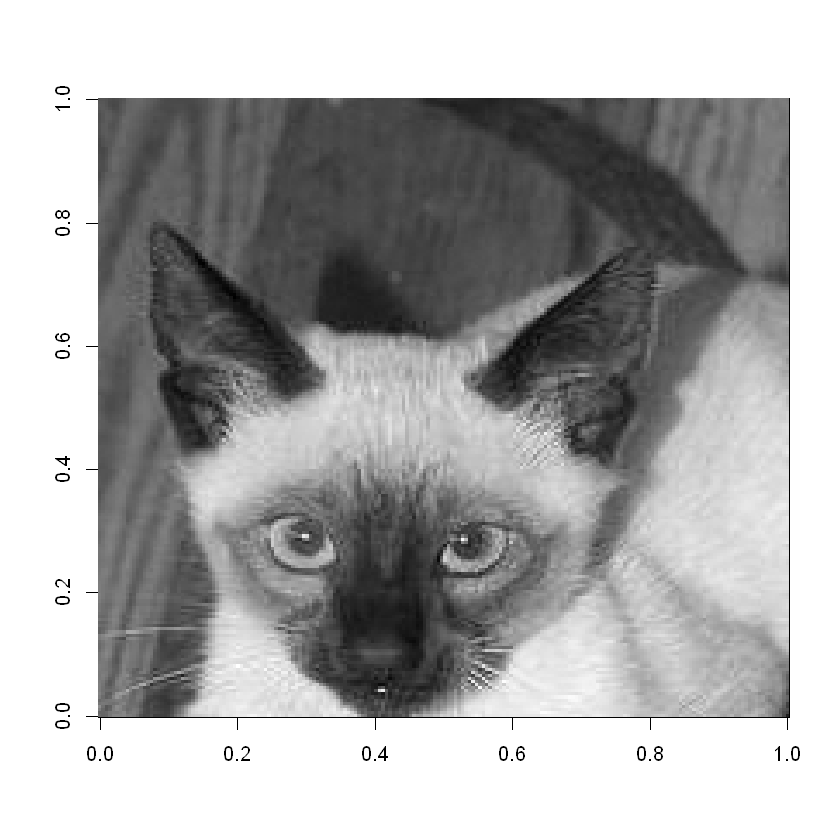

In [32]:
image(img, col = grey(seq(0, 1, length = 256)))

In [34]:
Ypred[9]

[1] -0.01420472

## Test with logistic regression

In [148]:
data = data.frame(Ctrain, Ytrain)

In [150]:
glm.fits <- glm(Ytrain~., data = data, family = binomial)

In [151]:
glm.probs <- predict(glm.fits, data.frame(Ctest), type = "response")

In [156]:
table((glm.probs > 0.5), Ytest)

       Ytest
         0  1
  FALSE 22  6
  TRUE   3 17

In [155]:
mean(Ytest == (glm.probs > 0.5))

[1] 0.8125